In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt 

In [7]:
#base directory
base_dir = r"C:/Users/Razak Addo/Desktop/BaseFolder"

#train
train_dir = base_dir + "/train"

#test
test_dir = base_dir + "/test"

#validation
validation_dir = base_dir + "/validation"

In [8]:
def getDataset(dataset_dir):
    image_data_gen = ImageDataGenerator(
       rescale= 1./255,
       rotation_range=40,
       width_shift_range=0.2,
       height_shift_range=0.2,
       shear_range=0.2,
       zoom_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest'
    )
    image_dataset = image_data_gen.flow_from_directory(
        dataset_dir,
        target_size=(256, 256),
        batch_size=30,
        class_mode= 'binary'
    )
    return image_dataset

train_data = getDataset(train_dir)

test_data = ImageDataGenerator(rescale= 1./255)
test_data = test_data.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=30,
    class_mode= 'binary'
)

validation_data = getDataset(validation_dir)

Found 520 images belonging to 2 classes.
Found 174 images belonging to 2 classes.
Found 173 images belonging to 2 classes.


In [9]:
for data_batch, label_batch in train_data:
    print(data_batch.shape)
    print(label_batch.shape)
    break

(30, 256, 256, 3)
(30,)


In [10]:
def buildModels():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(64, (3,3)))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(128, (3,3)))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [11]:
models = buildModels()

models.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
batch_size=32
history = models.fit(
    train_data,
    steps_per_epoch= 50,
    epochs=30,
    validation_data=validation_data,
    validation_steps= 20)

Epoch 1/30
50/50 [==============================] - 211s 4s/step - loss: 0.2566 - acc: 0.9681 - val_loss: 2.1744e-04 - val_acc: 1.0000
Epoch 2/30
50/50 [==============================] - 192s 4s/step - loss: 0.0257 - acc: 0.9932 - val_loss: 1.3473e-05 - val_acc: 1.0000
Epoch 3/30
50/50 [==============================] - 186s 4s/step - loss: 3.3865e-04 - acc: 1.0000 - val_loss: 0.8820 - val_acc: 0.6304
Epoch 4/30
50/50 [==============================] - 183s 4s/step - loss: 0.0210 - acc: 0.9931 - val_loss: 2.0068e-06 - val_acc: 1.0000
Epoch 5/30
50/50 [==============================] - 191s 4s/step - loss: 2.1735e-05 - acc: 1.0000 - val_loss: 5.1717e-07 - val_acc: 1.0000
Epoch 6/30
50/50 [==============================] - 193s 4s/step - loss: 0.0071 - acc: 0.9965 - val_loss: 4.4230e-08 - val_acc: 1.0000
Epoch 7/30
50/50 [==============================] - 246s 5s/step - loss: 1.5084e-06 - acc: 1.0000 - val_loss: 3.3031e-08 - val_acc: 1.0000
Epoch 8/30
50/50 [=============================

In [13]:
history_result = history.history
loss = history_result['loss']
acc = history_result['acc']
val_acc = history_result['val_acc']
val_loss = history_result['val_loss']
epochs = range(0, len(loss))

In [14]:
test_loss, test_acc = models.evaluate(test_data)
print('Accuracy:{}, Loss:{}'.format(test_acc, test_loss))

6/6 [==============================] - 11s 2s/step - loss: 0.0112 - acc: 0.9943
Accuracy:0.9942528605461121, Loss:0.01118155944259342


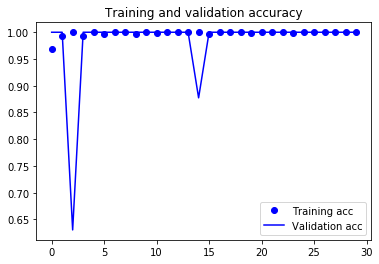

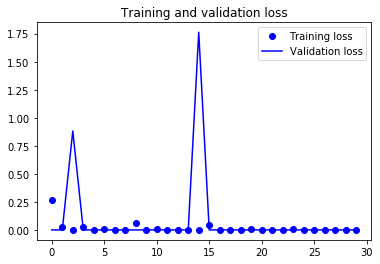

In [15]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
models.save('ProstateModel.h5')
model_json = models.to_json()
with open('Prostate_model_json.json', 'w') as files:
  files.write(model_json)

models.save_weights('ProstateModelWeight.h5')
print('model was saved..')

model was saved..


In [3]:
model = tf.keras.models.load_model(r"C:\Users\Razak Addo\Desktop\PROSTATEPROJECT\BaseFolder\H5\ProstateModel.h5")
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_

In [4]:
import tensorflow as tf
import numpy as np
image = tf.keras.preprocessing.image

img = image.load_img(r"C:\Users\Razak Addo\Desktop\PROSTATEPROJECT\PurelyTestingCancerous\Pictures\UNKNOWN001\4_26_2007_8_16_29_AM\IMG-0002-00007.jpg",target_size=(256,256))
img = image.img_to_array(img,dtype="float32")
img = img.reshape(((1,256,256,3)))
img = img/255.0
img_class = model.predict_classes(img)
classes= ["negative","positive"]
prediction = classes[img_class[0][0]]
print("Result:", prediction)

Result: positive
